#  <span style="color:orange">Natural Language Processing Tutorial (NLP101) - Level Beginner</span>

**Date Updated: May 02, 2020**

# 1.0 Objective of Tutorial
Welcome to Natural Language Processing Tutorial (NLP101). This tutorial assumes that you are new to PyCaret and looking to get started with Natural Language Processing using `pycaret.nlp` Module.

In this tutorial we will learn:


* **Getting Data:**  How to import data from PyCaret repository?
* **Setting up Environment:**  How to setup environment in PyCaret and perform critical text pre-processing tasks?
* **Create Model:**  How to create a topic model?
* **Assign Model:**  How to assign documents/text to topics using the trained model?
* **Plot Model:**  How to analyze topic models / overall corpus using various plots?
* **Save / Load Model:**  How to save / load model for future use?

Read Time : Approx. 30 Minutes


## 1.1 Installing PyCaret
First step to get started with PyCaret is to install PyCaret. Installing PyCaret is easy and take few minutes only. Follow the instructions below:

#### Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

#### Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`


## 1.2 Pre-Requisites
- Python 3.x
- Latest version of PyCaret
- Internet connection to load data from PyCaret's repository
- Basic Knowledge of NLP 

## 1.3 For Google Colab Users:
If you are running this notebook on Google Colab, run the following code at top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

## 1.4 See Also:
- __[Natural Language Processing Tutorial (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/Tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__
- __[Natural Language Processing Tutorial (NLP103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/Tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Expert%20-%20NLP103.ipynb)__

# 2.0 What is Natural Language Processing?

Natural Language Processing (NLP in short) is a branch of artificial intelligence that deals with analyzing, understanding and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages. Some of the common use cases of NLP in machine learning are: 

- **Topic discovery and modeling:** Capture the meaning and themes in text collections and apply advanced modeling techniques such as Topic Modeling to group similar documents together.
- **Sentiment Analysis:** Identifying the mood or subjective opinions within large amounts of text, including average sentiment and opinion mining.
- **Document summarization:** Automatically generating synopses of large bodies of text.
- **Speech-to-text and text-to-speech conversion:** Transforming voice commands into written text and vice versa.
- **Machine translation:** Automatic translation of text or speech from one language to another.  

__[Learn More about Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing)__

# 3.0 Overview of Natural Language Processing Module in PyCaret
PyCaret's NLP module (`pycaret.nlp`) is an unsupervised machine learning module which can be used for analyzing the text data by creating topic model to find hidden semantic structure in documents. PyCaret's NLP module comes built-in with a wide range of text pre-processing techniques, which is the fundamental step in any NLP problem. It transforms the raw text into a format which machine learning algorithms can learn from.

As of first release, PyCaret's NLP module only supports `English` language and provides several popular implementations of topic models from Latent Dirichlet Allocation to Non-Negative Matrix Factorization. It has over 5 ready-to-use algorithms and over 10 plots to analyze the text. PyCaret's NLP module also implements a unique function `tune_model()` that allows you to tune the hyperparameters of a topic model to optimize the supervised learning objective such as `AUC` for classification or `R2` for regression.

# 4.0 Dataset for the Tutorial

For this tutorial we will be using data from **Kiva Microfunds** https://www.kiva.org/. Kiva Microfunds is a non-profit that allows individuals to lend money to low-income entrepreneurs and students around the world. Since starting in 2005, Kiva has crowd-funded millions of loans with a repayment rate of around 98%. At Kiva, each loan request includes both traditional demographic information on the borrower, such as gender and location, as well as a personal story. In this tutorial we will use the text given in personal story to gain insights of the dataset and understand hidden semantic structure in the text. The dataset contains 6,818 samples. Short description of features are below:

- **country:** country of borrower
- **en:** Personal story of the borrower when applied for loan
- **gender:** Gender (M=male, F=female)
- **loan_amount:** Amount of loan approved and disbursed
- **nonpayment:** Type of lender (Lender = personal registered user on Kiva website, Partner = microfinance institution who work with Kiva to find and fund loans)
- **sector:** sector of borrower
- **status:** status of loan (1-default, 0-repaid)

In this tutorial we will only use `en` column to create a topic model. In the next tutorial __[Natural Language Processing (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/Tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__ we will use topic model to build a classifier that predicts `status` of the loan to know whether the applicant will default or not. 

#### Dataset Acknowledgement:
Kiva Microfunds https://www.kiva.org/ 

# 5.0 Getting the Data

You can download the data from PyCaret's git repository __[Click Here to Download](https://github.com/pycaret/pycaret/blob/master/datasets/kiva.csv)__ or you can load it using `get_data()` function (This will require internet connection).

In [1]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [2]:
#check the shape of data
data.shape

(6818, 7)

In [3]:
# sampling the data to select only 1000 documents
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

# 6.0 Setting up Environment in PyCaret

`setup()` function initializes the environment in PyCaret and performs several text pre-processing steps that are imperative to work with NLP problems. `setup()` must be called before executing any other function in PyCaret. It takes two parameters: pandas dataframe and the name of the text column passed as `target` parameter. You can also pass a `list` containing text, in which case you don't need to pass `target` parameter. When setup is executed, the following pre-processing steps are applied automatically:

- **Removing Numeric Characters:** All numeric characters are removed from the text. They are replaced with blanks.<br/>
<br/>
- **Removing Special Characters:** All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.<br/>
<br/>
- **Word Tokenization:** Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis. __[Read More](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)__ <br/>
<br/> 
- **Stopword Removal:** A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc. __[Read More](https://en.wikipedia.org/wiki/Stop_words)__ <br/>
<br/>
- **Bigram Extraction:** A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York"  __[Read More](https://en.wikipedia.org/wiki/Bigram)__ <br/>
<br/>
- **Trigram Extraction:** Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens. __[Read More](https://en.wikipedia.org/wiki/Trigram)__ <br/>
<br/>
- **Lemmatizing:** Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example, the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. __[Read More](https://en.wikipedia.org/wiki/Lemmatisation)__ <br/>
<br/>
- **Custom Stopwords:** Many times text contains words that are not stopwords by the rules of the language, but they add no or very little information. For example, in this tutorial we are using the loan dataset. As such, words like "loan", "bank", "money", "business" are too obvious and adds no value. More often than not, they also add a lot of noise in the topic model. You can remove those words from corpus by using `custom_stopwords` parameter. In next tutorial, __[Natural Language Processing Tutorial (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/Tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__ we will demonstrate the use of `custom_stopwords` parameter inside `setup()`. <br/>
<br/>

**Note :** Some functionalities in `pycaret.nlp` require English language model. The language model is not downloaded automatically when you install pycaret. You will have to download these using Python's command line interface, such as Anaconda Prompt. To download the model, please type the following in your command line:

`python -m spacy download en_core_web_sm` <br/>
`python -m textblob.download_corpora` <br/>

In [4]:
from pycaret.nlp import *

In [5]:
exp_nlp101 = setup(data = data, target = 'en', session_id = 123)

Description,Value
session_id,123
# Documents,1000
Vocab Size,6761
Custom Stopwords,False


Once the setup is succesfully executed it prints the information grid with the following information: 

- **session_id :**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated, which is distributed to all functions. In this experiment session_id is set as `123` for later reproducibility.<br/>
<br/>
- **# Documents :** Number of documents (or samples in dataset if dataframe is passed). <br/>
<br/>
- **Vocab Size :** Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization, etc. <br/>

Notice that all text pre-processing steps are performed automatically when you execute `setup()`. These steps are imperative to perform any NLP experiment. `setup()` function prepares the corpus and dictionary that is ready-to-use for the topic models that you can create using `create_model()` function. Another way to pass the text is in the form of a list. See an example below:

In [6]:
#convert 'en' column of dataset into list format
text_list = list(data['en'])
type(text_list)

list

In [7]:
exp_nlp101_list = setup(data = text_list, session_id = 123)

Description,Value
session_id,123
# Documents,1000
Vocab Size,6761
Custom Stopwords,False


Notice the output of `exp_nlp101_list` is identical to the output of `exp_nlp101`.

# 7.0 Create a Topic Model

**What is Topic Model?** In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is. __[Read More](https://en.wikipedia.org/wiki/Topic_model)__

Creating a topic model in PyCaret is simple and similar to how you would have created a model in supervised modules of PyCaret. A topic model is created using `create_model()` function which takes one mandatory parameter i.e. the name of the model as a string. This function returns a trained model object. There are 5 topic models available in PyCaret. see the docstring of `create_model()` for complete list of models. See an example below where we create Latent Dirichlet Allocation (LDA) model:

In [8]:
lda = create_model('lda')

In [9]:
print(lda)

LdaModel(num_terms=6761, num_topics=4, decay=0.5, chunksize=100)


We have created Latent Dirichlet Allocation (LDA) model with just one word i.e. `create_model()`. Notice that the `num_topics` parameter is set to `4`, which is a default value when you do not pass `num_topics` parameter in `create_model()`. In the below example, we will create an LDA model with 6 topics and we will also set `multi_core` parameter to `True`. When `multi_core` is set to `True` Latent Dirichlet Allocation (LDA) uses all CPU cores to parallelize and speed up model training.

In [10]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)

In [11]:
print(lda2)

LdaModel(num_terms=6761, num_topics=6, decay=0.5, chunksize=100)


# 8.0 Assign a Model

Now, after we have created a topic model, we would like to assign the topic proportions to our dataset (6818 documents / samples) to analyze the results. We will achieve this by using `assign_model()` function. See an example below:

In [12]:
lda_results = assign_model(lda)
lda_results.head()

,en,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,praxide marry child primary school train tailo...,0.124381,0.002221,0.873075,0.000323,Topic 2,0.87
1,dr odongo obs gynaecology practitioner run rep...,0.003739,0.562978,0.433032,0.000252,Topic 1,0.56
2,ana josefa single_mother live san_cristobal wh...,0.223984,0.702847,0.072889,0.000280,Topic 1,0.70
3,phanice marry child daughter secondary school ...,0.244497,0.002180,0.753006,0.000317,Topic 2,0.75
4,fredrice nzioka kilonzo year old hotel kaptemb...,0.172208,0.086028,0.741453,0.000312,Topic 2,0.74


Notice how 6 additional columns are now added to the dataframe. `en` is the text after all pre-processing. `Topic_0 ... Topic_3` are the topic proportions and represent the distribution of topics for each document. `Dominant_Topic` is the topic number with the highest proportion and `Perc_Dominant_Topic` is the percentage of dominant topic over 1 (only shown when models are stochastic i.e. sum of all proportions equal to 1) .

# 9.0 Plot a Model

`plot_model()` function can be used to analyze the overall corpus or only specific topics extracted through topic model. Hence the function `plot_model()` can also work without passing any trained model object. See examples below:

### 9.1 Frequency Distribution of Entire Corpus

In [13]:
plot_model()

### 9.2 Top 100 Bigrams on Entire Corpus

In [14]:
plot_model(plot = 'bigram')

### 9.3 Frequency Distribution of Topic 1

`plot_model()` can also be used to analyze the same plots for specific topics. To generate plots at the topic level, the function requires the trained model object to be passed inside `plot_model()`. In the example below we will generate a frequency distribution on `Topic 1` only as defined by `topic_num` parameter.

In [15]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

### 9.4 Topic Distribution

In [16]:
plot_model(lda, plot = 'topic_distribution')

Each document is a distribution of topics and not a single topic. Although, if the task is about categorizing the document into specific topics, it wouldn't be wrong to use the topic proportion with the highest value to categorize the document into **a topic**. In the above plot, each document is categorized into one topic using the largest proportion of topic weights. We can see that the most of the documents are in `Topic 3` with only few in `Topic 1`. If you hover over these bars, you will get a basic idea of the themes in this topic by looking at the keywords. For example, if you evaluate `Topic 2`, you will see keywords like 'farmer', 'rice', 'land', which probably means that the loan applicants in this category pertain to agricultural/farming loans. However, if you hover over `Topic 0` and `Topic 3` you will observe a lot of repititions and the keywords are overlapping in all topics. For instance, the words such as "loan" and "business" appear both in `Topic 0` and `Topic 3`. In the next tutorial, __[Natural Language Processing Tutorial (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/Tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__ we will demonstrate the use of `custom_stopwords`, at which point we will re-analyze this plot.

### 9.5 T-distributed Stochastic Neighbor Embedding (t-SNE)

In [17]:
plot_model(lda, plot = 'tsne')

T-distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. 

__[Learn More](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)__

### 9.6 Uniform Manifold Approximation and Projection Plot

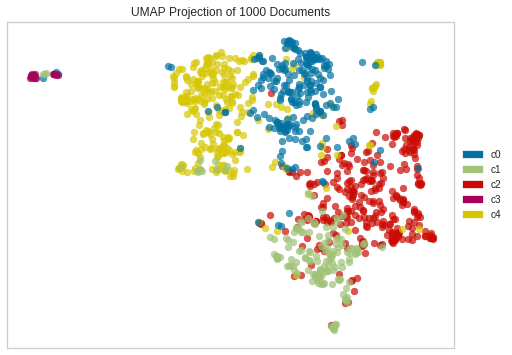

In [18]:
plot_model(lda, plot = 'umap')

UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimensionality reduction. It is similar to tSNE and PCA in its purpose as all of them are techniques to reduce dimensionality for 2d/3d projections. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology. 

__[Learn More](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)__

# 10.0 Evaluate Model

Another way to analyze the performance of models is to use `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. See the example below where we have generated Sentiment Polarity Plot for `Topic 3` using the LDA model stored in `lda` variable.

In [19]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# 11.0 Saving the Model

As you get deeper into Natural Language Processing, you will learn that the training time of topic models increases exponentially as the size of corpus increases. As such, if you would like to continue your experiment or analysis at a later point, you don't need to repeat the entire experiment and re-train your model. PyCaret's inbuilt function `save_model()` allows you to save the model for later use.

In [20]:
save_model(lda,'Final LDA Model 08Feb2020')

Model Succesfully Saved


# 12.0 Loading the Model

To load the saved model on a future date in the same or different environment, we would use the PyCaret's `load_model()` function.

In [21]:
saved_lda = load_model('Final LDA Model 08Feb2020')

Model Sucessfully Loaded


In [22]:
print(saved_lda)

LdaModel(num_terms=6761, num_topics=4, decay=0.5, chunksize=100)


# 13.0 Wrap-Up / Next Steps?

What we have covered in this tutorial is the entire workflow for Natural Language Processing experiment. Our task today was to create and analyze a topic model. We have performed several text pre-processing steps using `setup()`, then we have created a topic model using `create_model()`, assigned topics to the dataset using `assign_model()` and analyzed the results using `plot_model()`. All this was completed in less than 10 commands that are naturally constructed and very intuitive to remember. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code.

In this tutorial, we have only covered the basics of `pycaret.nlp`. In the next tutorial we will demonstrate the use of `tune_model()` to automatically select the number of topics for a topic model. We will also go deeper into a few concepts and techniques, such as `custom_stopwords`, to improve the result of the topic model. 

See you at the next tutorial. Follow the link to __[Natural Language Processing (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/Tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__